In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Now we need to read in the data
df = pd.read_csv(r'C:\Users\17186\Downloads\movies.csv')
# Now let's take a look at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [2]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [11]:
df['budget'] = df['budget'].fillna(df['budget'].mean())
df['gross'] = df['gross'].fillna(df['gross'].mean())
df = df.dropna(subset=['rating'])
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,4.699877e+07,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,5.885311e+07,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,1.800000e+07,5.383751e+08,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,8.345354e+07,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,3.984634e+07,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,3.558988e+07,2.406631e+08,Beijing Enlight Pictures,110.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,3.558988e+07,4.133780e+05,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5.000000e+03,7.850054e+07,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,3.558988e+07,1.326600e+04,Roxwell Films,87.0


In [12]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [13]:
## Change Column datatypes
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,35589876,240663149,Beijing Enlight Pictures,110.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,78500541,Notis Studio,78.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35589876,13266,Roxwell Films,87.0


In [19]:
df['YearCorrect']=df['released'].astype(str)


In [24]:
df['format_released'] = pd.to_datetime(df['released'].str.extract(r'(\w+ \d+, \d+)', expand=False), format='%B %d, %Y')
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,format_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980 (United States)",1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980 (United States)",1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980 (United States)",1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980 (United States)",1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980 (United States)",1980-07-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,35589876,240663149,Beijing Enlight Pictures,110.0,"October 1, 2020 (United States)",2020-10-01
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120.0,"June 3, 2020 (United States)",2020-06-03
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,78500541,Notis Studio,78.0,"February 7, 2020 (United States)",2020-02-07
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35589876,13266,Roxwell Films,87.0,"March 3, 2020 (United States)",2020-03-03


In [26]:
df['yearcorrect']=df['format_released'].astype(str).str[:4] 
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,format_released,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980 (United States)",1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980 (United States)",1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980 (United States)",1980-06-20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980 (United States)",1980-07-02,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980 (United States)",1980-07-25,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,35589876,240663149,Beijing Enlight Pictures,110.0,"October 1, 2020 (United States)",2020-10-01,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120.0,"June 3, 2020 (United States)",2020-06-03,2020
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,78500541,Notis Studio,78.0,"February 7, 2020 (United States)",2020-02-07,2020
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35589876,13266,Roxwell Films,87.0,"March 3, 2020 (United States)",2020-03-03,2020


In [27]:
# Order our Data 

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,format_released,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009 (United States)",2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019 (United States)",2019-04-26,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997 (United States)",1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015 (United States)",2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018 (United States)",2018-04-27,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,35589876,1672,Polygram Filmed Entertainment,87.0,"October 30, 1998 (United Kingdom)",1998-10-30,1998
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,35589876,1605,Balboa Entertainment,110.0,"August 30, 1996 (Denmark)",1996-08-30,1996
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,"February 9, 2001 (United States)",2001-02-09,2001
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,"June 26, 2020 (United States)",2020-06-26,2020


In [29]:
#Drop Duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,format_released,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980 (United States)",1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980 (United States)",1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980 (United States)",1980-06-20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980 (United States)",1980-07-02,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980 (United States)",1980-07-25,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,35589876,240663149,Beijing Enlight Pictures,110.0,"October 1, 2020 (United States)",2020-10-01,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,35589876,413378,Pryor Entertainment,120.0,"June 3, 2020 (United States)",2020-06-03,2020
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,78500541,Notis Studio,78.0,"February 7, 2020 (United States)",2020-02-07,2020
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,35589876,13266,Roxwell Films,87.0,"March 3, 2020 (United States)",2020-03-03,2020


In [ ]:
#Budget high correlation
#Company high correlation

<function matplotlib.pyplot.show(close=None, block=None)>

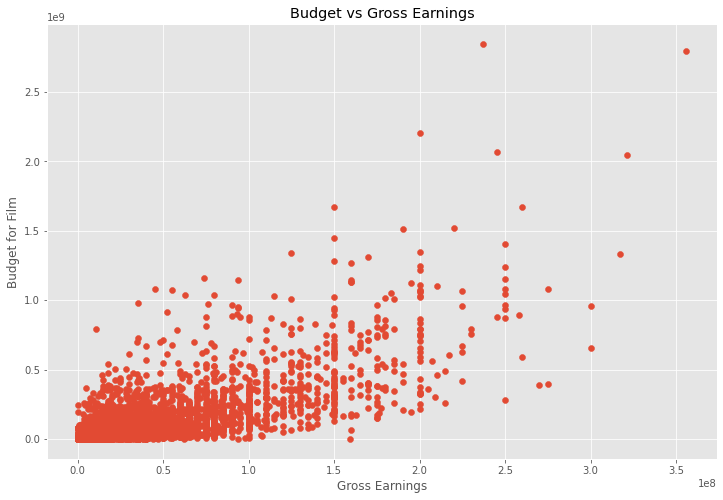

In [32]:
#Scatterplot with budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

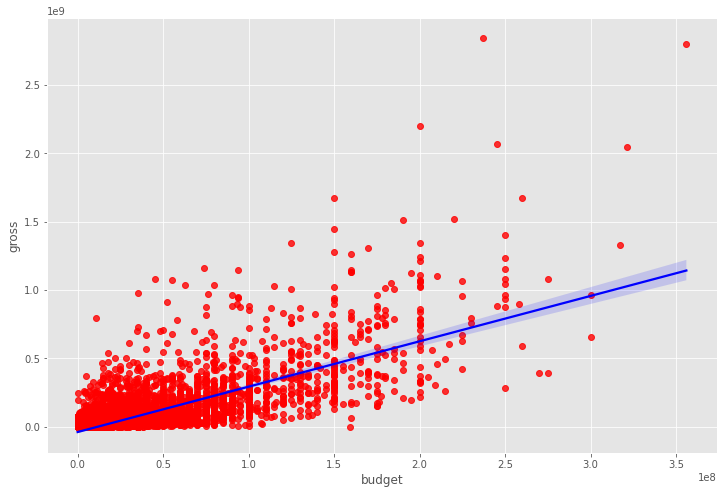

In [36]:
#Plot the budget vs gross using seaborn
sns.regplot(x="budget", y="gross", data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [37]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.103577,0.227017,0.268706,0.254429,0.121526
score,0.103577,1.000000,0.411973,0.064756,0.185247,0.400949
votes,0.227017,0.411973,1.000000,0.421227,0.629321,0.309664
budget,0.268706,0.064756,0.421227,1.000000,0.712438,0.265781
gross,0.254429,0.185247,0.629321,0.712438,1.000000,0.241884
runtime,0.121526,0.400949,0.309664,0.265781,0.241884,1.000000


In [38]:
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.071488,0.339628,0.145765,0.185854,0.097637
score,0.071488,1.000000,0.304163,0.002703,0.083483,0.284471
votes,0.339628,0.304163,1.000000,0.165937,0.513239,0.199170
budget,0.145765,0.002703,0.165937,1.000000,0.262486,0.162231
gross,0.185854,0.083483,0.513239,0.262486,1.000000,0.158274
runtime,0.097637,0.284471,0.199170,0.162231,0.158274,1.000000


In [39]:
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.104660,0.483279,0.204757,0.272271,0.143714
score,0.104660,1.000000,0.433712,0.003548,0.122609,0.401078
votes,0.483279,0.433712,1.000000,0.240847,0.696023,0.291645
budget,0.204757,0.003548,0.240847,1.000000,0.367193,0.228779
gross,0.272271,0.122609,0.696023,0.367193,1.000000,0.231108
runtime,0.143714,0.401078,0.291645,0.228779,0.231108,1.000000


In [ ]:
#High correlation between budget and gross
#First Hypothesis was correct

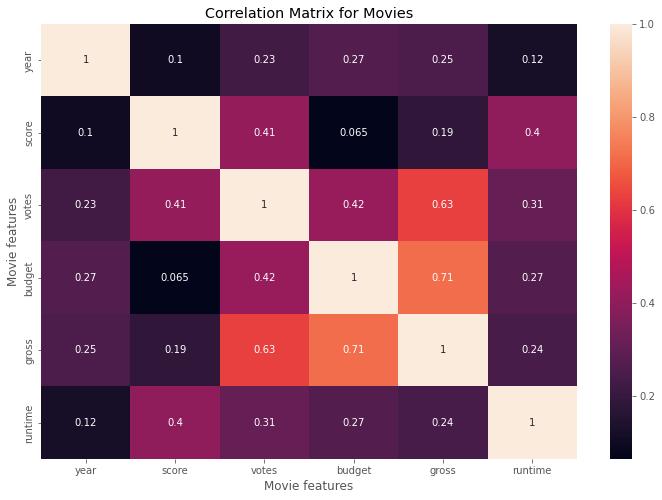

In [41]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [46]:
#Look at Company
df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,format_released,yearcorrect
0,6520,6,6,1980,1687,8.4,927000.0,2551,3966,1025,54,19000000,46998772,2277,146.0,1687,1980-06-13,0
1,5511,6,1,1980,1474,5.8,65000.0,2239,1615,316,55,4500000,58853106,713,104.0,1474,1980-07-02,0
2,5084,4,0,1980,1753,8.7,1200000.0,1095,2538,1713,55,18000000,538375067,1509,124.0,1753,1980-06-20,0
3,283,4,4,1980,1474,7.7,221000.0,1282,1978,2203,55,3500000,83453539,1773,88.0,1474,1980-07-02,0
4,1017,6,4,1980,1525,7.3,108000.0,1039,513,398,55,6000000,39846344,1740,98.0,1525,1980-07-25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655,3158,9,2,2020,2784,6.6,1300.0,2673,-1,912,8,35589876,240663149,363,110.0,2784,2020-10-01,40
7656,6952,5,4,2020,1867,5.0,294.0,2477,3827,2332,55,35589876,413378,1866,120.0,1867,2020-06-03,40
7658,790,6,6,2020,1093,6.6,35.0,1745,1054,516,55,5000,78500541,1713,78.0,1093,2020-02-07,40
7659,2629,3,9,2020,2122,3.4,447.0,1589,2438,1505,55,35589876,13266,1952,87.0,2122,2020-03-03,40


In [47]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,format_released,yearcorrect
5445,528,5,0,2009,690,7.8,1100000.0,1139,1759,2289,55,237000000,2847246203,2212,162.0,690,2009-12-18,29
7445,530,5,0,2019,182,8.4,903000.0,160,732,2198,55,356000000,2797501328,1575,181.0,182,2019-04-26,39
3045,6827,5,6,1997,698,7.8,1100000.0,1139,1759,1565,55,200000000,2201647264,2212,194.0,698,1997-12-19,17
6663,5086,5,0,2015,692,7.8,876000.0,1109,2522,509,55,245000000,2069521700,1509,138.0,692,2015-12-18,35
7244,531,5,0,2018,191,8.4,897000.0,160,732,2198,55,321000000,2048359754,1575,149.0,191,2018-04-27,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,2659,6,5,1998,2999,6.1,2900.0,1924,1262,2118,54,35589876,1672,1833,87.0,2999,1998-10-30,18
2906,4348,3,5,1996,520,7.4,37000.0,2019,1936,1478,11,35589876,1605,328,110.0,520,1996-08-30,16
3818,3326,6,4,2000,1105,6.5,5200.0,718,1107,2274,54,35589876,1400,466,103.0,1105,2001-02-09,21
7580,4610,3,5,2019,1816,5.2,735.0,1426,2180,2234,55,35589876,682,1952,93.0,1816,2020-06-26,40


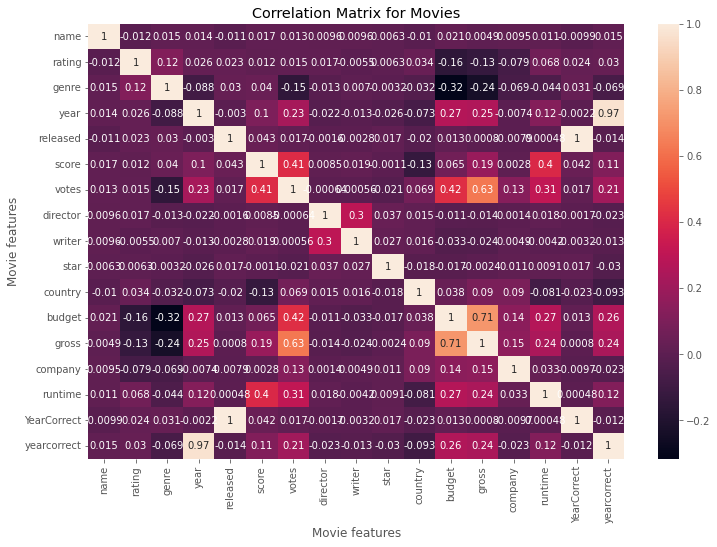

In [50]:
#Correlation map to visualize the correlation intensity
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation Matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [51]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearCorrect,yearcorrect
name,1.000000,-0.012160,0.015087,0.013595,-0.010712,0.016534,0.013145,0.009598,0.009628,0.006274,-0.010150,0.020887,0.004949,0.009469,0.011381,-0.009875,0.015439
rating,-0.012160,1.000000,0.118008,0.026158,0.022983,0.011653,0.015314,0.017111,-0.005507,0.006262,0.034004,-0.155546,-0.128932,-0.078886,0.067572,0.023612,0.030394
genre,0.015087,0.118008,1.000000,-0.087534,0.030069,0.040403,-0.148201,-0.013460,0.006952,-0.003193,-0.032244,-0.316612,-0.238222,-0.068885,-0.044442,0.030735,-0.069344
year,0.013595,0.026158,-0.087534,1.000000,-0.003022,0.103577,0.227017,-0.021961,-0.012583,-0.026474,-0.072554,0.268706,0.254429,-0.007445,0.121526,-0.002238,0.967926
released,-0.010712,0.022983,0.030069,-0.003022,1.000000,0.042887,0.016759,-0.001603,-0.002790,0.017449,-0.020227,0.013001,0.000800,-0.007922,0.000476,0.998445,-0.013547
score,0.016534,0.011653,0.040403,0.103577,0.042887,1.000000,0.411973,0.008532,0.019215,-0.001055,-0.129806,0.064756,0.185247,0.002757,0.400949,0.042243,0.111968
votes,0.013145,0.015314,-0.148201,0.227017,0.016759,0.411973,1.000000,-0.000642,0.000558,-0.020649,0.069400,0.421227,0.629321,0.130770,0.309664,0.016812,0.210517
director,0.009598,0.017111,-0.013460,-0.021961,-0.001603,0.008532,-0.000642,1.000000,0.296779,0.037475,0.014573,-0.010518,-0.013907,0.001377,0.017681,-0.001652,-0.023110
writer,0.009628,-0.005507,0.006952,-0.012583,-0.002790,0.019215,0.000558,0.296779,1.000000,0.026886,0.015501,-0.033272,-0.023661,0.004873,-0.004193,-0.003173,-0.013284
star,0.006274,0.006262,-0.003193,-0.026474,0.017449,-0.001055,-0.020649,0.037475,0.026886,1.000000,-0.017564,-0.017013,-0.002401,0.010542,0.009062,0.017476,-0.030031


In [54]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.012160
             genre          0.015087
             year           0.013595
             released      -0.010712
                              ...   
yearcorrect  gross          0.237888
             company       -0.023259
             runtime        0.116141
             YearCorrect   -0.011918
             yearcorrect    1.000000
Length: 289, dtype: float64

In [55]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre        budget        -0.316612
budget       genre         -0.316612
genre        gross         -0.238222
gross        genre         -0.238222
rating       budget        -0.155546
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
YearCorrect  YearCorrect    1.000000
yearcorrect  yearcorrect    1.000000
Length: 289, dtype: float64


In [56]:
#Review Pairs with a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

votes        gross          0.629321
gross        votes          0.629321
             budget         0.712438
budget       gross          0.712438
yearcorrect  year           0.967926
year         yearcorrect    0.967926
released     YearCorrect    0.998445
YearCorrect  released       0.998445
name         name           1.000000
writer       writer         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
YearCorrect  YearCorrect    1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64


In [ ]:
#Votes and budget have the highest correlation to gross earnings
#Company has low correlaton
#My second hypothesis was ot correct

In [ ]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

In [ ]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

In [ ]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()